### Importación de datos



In [ ]:
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)


tienda['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

df_completo = pd.concat([tienda, tienda2, tienda3, tienda4])

tienda.head()
tienda2.head()
tienda3.head()
tienda4.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
0,Lavavajillas,Electrodomésticos,1084800.0,56000.0,11/11/2022,Rafael Acosta,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175,Tienda 4
1,Cama box,Muebles,473800.0,25400.0,03/01/2020,Izabela de León,Cúcuta,5,Tarjeta de crédito,2,7.89391,-72.50782,Tienda 4
2,Balón de baloncesto,Deportes y diversión,23700.0,0.0,25/12/2022,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 4
3,Modelado predictivo,Libros,57700.0,1300.0,23/11/2021,Lucas Olivera,Medellín,3,Nequi,1,6.25184,-75.56359,Tienda 4
4,Auriculares,Electrónicos,138900.0,5600.0,25/04/2022,Blanca Ramirez,Bogotá,4,Tarjeta de crédito,7,4.60971,-74.08175,Tienda 4


#1. Análisis de facturación



     Tienda        Ingresos
0  Tienda 1  $1.150.880.400
1  Tienda 2  $1.116.343.500
2  Tienda 3  $1.098.019.600
3  Tienda 4  $1.038.375.700


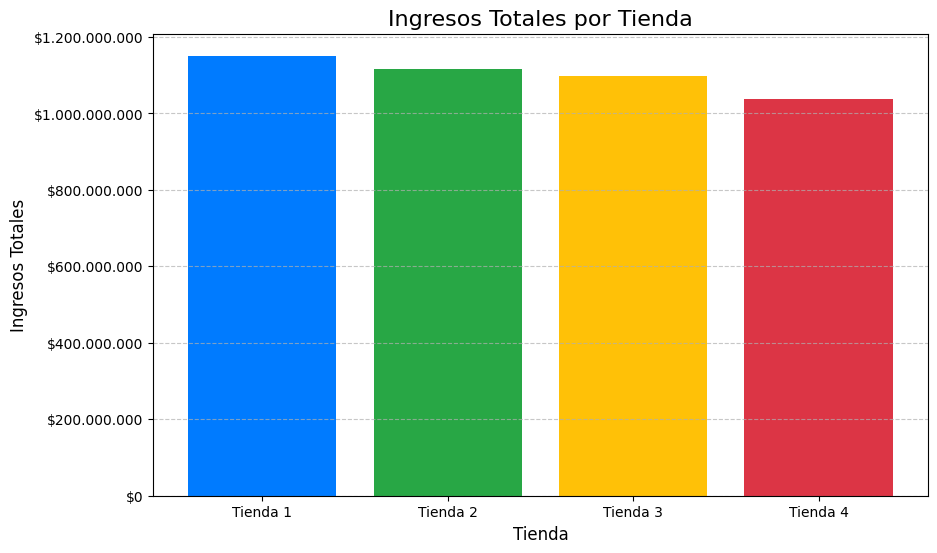

In [ ]:
# --- Calcular el ingreso total de cada tienda ---
ingreso_tienda1 = tienda['Precio'].sum()
ingreso_tienda2 = tienda2['Precio'].sum()
ingreso_tienda3 = tienda3['Precio'].sum()
ingreso_tienda4 = tienda4['Precio'].sum()

# --- Formatear ingresos ---
# f'${variable:,.0f}' -> Crea un string como '$1,234,567'
# .replace(',', '.')   -> Reemplaza las comas por puntos

str_ingreso1 = f"${ingreso_tienda1:,.0f}".replace(',', '.')
str_ingreso2 = f"${ingreso_tienda2:,.0f}".replace(',', '.')
str_ingreso3 = f"${ingreso_tienda3:,.0f}".replace(',', '.')
str_ingreso4 = f"${ingreso_tienda4:,.0f}".replace(',', '.')

# --- Realizar resumen DataFrame ---
resumen_ingresos = pd.DataFrame({
        'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
        'Ingresos': [str_ingreso1, str_ingreso2, str_ingreso3, str_ingreso4]
    })
# --- Mostrar resumen ---
print(resumen_ingresos)

#-------------------------- Grafico ---------------------------------

# --- 1. Preparamos los datos para el gráfico ---
labels = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
ingresos_numericos = [ingreso_tienda1, ingreso_tienda2, ingreso_tienda3, ingreso_tienda4]

# --- 2. Función para formatear el eje Y como peso ---
# (Esta es la misma lógica que usamos para imprimir)
def format_peso(valor, pos):
    # 'valor' es el número del eje (ej. 1500000)
    # 'pos' es la posición (ignorado, pero requerido por FuncFormatter)
    return f"${valor:,.0f}".replace(',', '.')

# --- 3. Crear el gráfico ---
plt.figure(figsize=(10, 6)) # Tamaño (ancho, alto)
colores = ['#007bff', '#28a745', '#ffc107', '#dc3545'] # Colores bonitos

# Creamos las barras
plt.bar(labels, ingresos_numericos, color=colores)

# --- 4. Añadir Títulos y Etiquetas ---
plt.title('Ingresos Totales por Tienda', fontsize=16)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Ingresos Totales', fontsize=12)

# --- 5. (CLAVE) Aplicar el formato de moneda al eje Y ---
formatter = FuncFormatter(format_peso)
# 'gca()' obtiene el eje actual (get current axis) y aplica el formateador
plt.gca().yaxis.set_major_formatter(formatter)

# --- 6. Añadir grid para legibilidad ---
# Dibuja líneas horizontales punteadas
plt.grid(axis='y', linestyle='--', alpha=0.7)

# --- 7. Mostrar el gráfico ---
plt.savefig('ingresos_totales.png')
plt.show()

# 2. Ventas por categoría

In [ ]:
# --- Calcular y mostrar ventas por categoría para cada tienda ---
    # .value_counts() agrupa, cuenta y ordena de más popular a menos popular.

print("--- Ventas por Categoría - Tienda 1 ---")
ventas_t1 = tienda['Categoría del Producto'].value_counts()
print(ventas_t1)

print("\n--- Ventas por Categoría - Tienda 2 ---")
ventas_t2 = tienda2['Categoría del Producto'].value_counts()
print(ventas_t2)

print("\n--- Ventas por Categoría - Tienda 3 ---")
ventas_t3 = tienda3['Categoría del Producto'].value_counts()
print(ventas_t3)

print("\n--- Ventas por Categoría - Tienda 4 ---")
ventas_t4 = tienda4['Categoría del Producto'].value_counts()
print(ventas_t4)

--- Ventas por Categoría - Tienda 1 ---
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64

--- Ventas por Categoría - Tienda 2 ---
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64

--- Ventas por Categoría - Tienda 3 ---
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Instrumentos musicales     177
Artículos para el hogar    177
Name: count, 

# 3. Calificación promedio de la tienda



--- Calificación Promedio por Tienda ---
--- Calificación Promedio (Ordenada) ---
     Tienda  Promedio
2  Tienda 3      4.05
1  Tienda 2      4.04
3  Tienda 4      4.00
0  Tienda 1      3.98


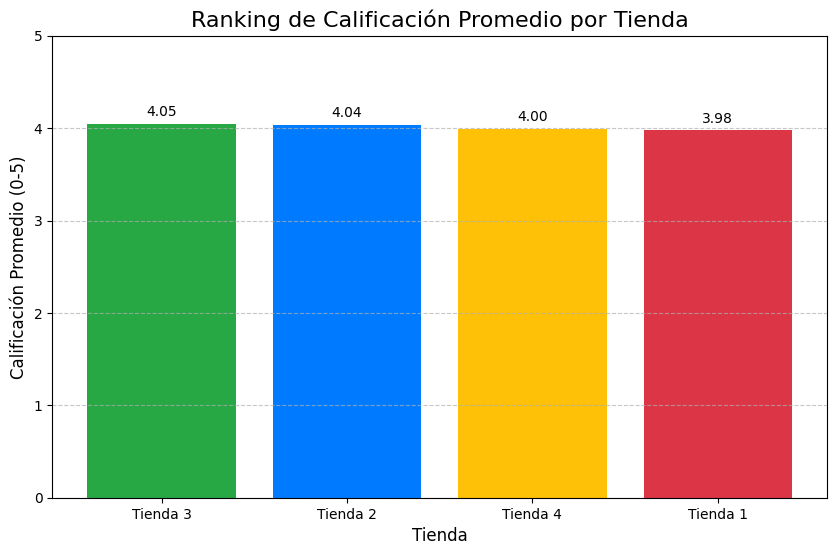

In [ ]:
# --- Calcular el promedio de 'Calificación' por Tienda ---
calificaciones_promedio = df_completo.groupby('Tienda')['Calificación'].mean()

# --- Mostrar los resultados ---
print("\n--- Calificación Promedio por Tienda ---")

#---- Gráfico ---------------------

# --- Preparar datos para el gráfico (ordenados) ---
    # Convertimos la Serie a un DataFrame y ordenamos de mayor a menor
df_plot = calificaciones_promedio.reset_index(name='Promedio')
df_plot = df_plot.sort_values(by='Promedio', ascending=False)

print("--- Calificación Promedio (Ordenada) ---")
print(df_plot.round(2))
# --- Crear el Gráfico de Barras ---
plt.figure(figsize=(10, 6))

    # Creamos las barras usando los datos ordenados
barras = plt.bar(df_plot['Tienda'], df_plot['Promedio'], color=['#28a745', '#007bff', '#ffc107', '#dc3545'])

    # --- Añadir Títulos y Etiquetas ---
plt.title('Ranking de Calificación Promedio por Tienda', fontsize=16)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Calificación Promedio (0-5)', fontsize=12)

    # --- Establecer límites del eje Y para contexto ---
    # Esto evita que pequeñas diferencias parezcan enormes
plt.ylim(0, 5)

    # --- Añadir grid horizontal para legibilidad ---
plt.grid(axis='y', linestyle='--', alpha=0.7)

    # --- Añadir etiquetas de datos encima de las barras ---
for bar in barras:
        yval = bar.get_height()
        # Ponemos el texto formateado a 2 decimales
        plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.05, f'{yval:.2f}',
                 ha='center', va='bottom', fontsize=10)

# ---- Mostrar---
plt.savefig('calificacion_promedio.png')
plt.show()

# 4. Productos más y menos vendidos


--- PRODUCTOS MÁS VENDIDOS POR TIENDA ---
     Tienda Categoría del Producto  Cantidad
0  Tienda 1                Muebles       465
1  Tienda 2                Muebles       442
2  Tienda 3                Muebles       499
3  Tienda 4                Muebles       480

--- PRODUCTOS MENOS VENDIDOS POR TIENDA ---
     Tienda   Categoría del Producto  Cantidad
0  Tienda 1  Artículos para el hogar       171
1  Tienda 2  Artículos para el hogar       181
2  Tienda 3  Artículos para el hogar       177
3  Tienda 4   Instrumentos musicales       170



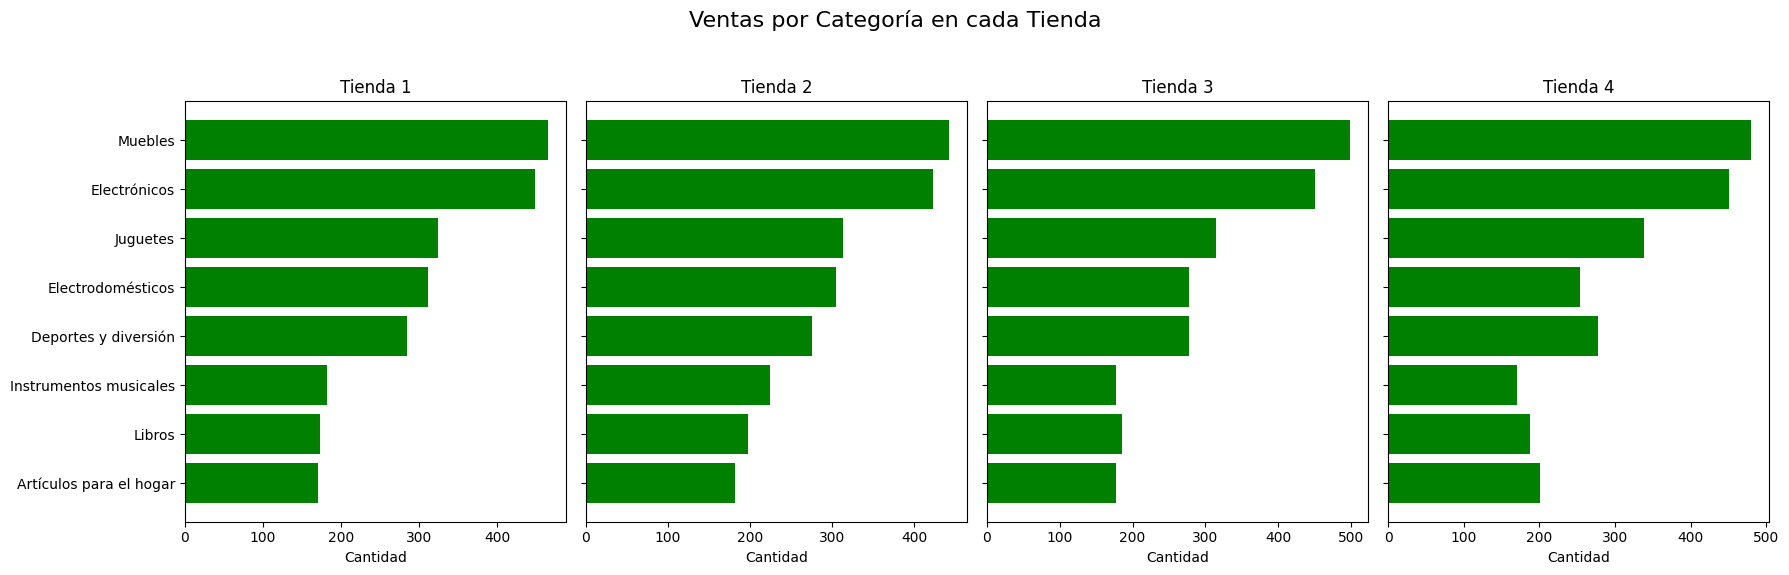

In [ ]:
ventas_por_categoria = df_completo.groupby(['Tienda', 'Categoría del Producto']).size().reset_index(name='Cantidad')

# --- Identificar MÁS vendidos ---
# Ordenamos (descendente) y tomamos el primero de cada tienda
ventas_top = ventas_por_categoria.sort_values(by=['Tienda', 'Cantidad'], ascending=[True, False])
mas_vendidos = ventas_top.groupby('Tienda').first().reset_index()

# --- Identificar MENOS vendidos ---
# Ordenamos (ascendente) y tomamos el primero de cada tienda
ventas_bottom = ventas_por_categoria.sort_values(by=['Tienda', 'Cantidad'], ascending=[True, True])
menos_vendidos = ventas_bottom.groupby('Tienda').first().reset_index()

# --- Mostrar resultados en texto ---
print("\n" + "="*40)
print("--- PRODUCTOS MÁS VENDIDOS POR TIENDA ---")
print(mas_vendidos)
print("\n" + "="*40)
print("--- PRODUCTOS MENOS VENDIDOS POR TIENDA ---")
print(menos_vendidos)
print("="*40 + "\n")


# --- Crear el gráfico con Matplotlib ---

    # Obtenemos la lista de tiendas únicas
tiendas_unicas = ventas_por_categoria['Tienda'].unique()

    # Creamos una figura con sub-gráficos (uno para cada tienda)
    # 1 fila, 4 columnas (una por tienda). Ajusta el figsize (ancho, alto) a gusto.
fig, axes = plt.subplots(nrows=1, ncols=len(tiendas_unicas), figsize=(18, 6), sharey=True)

    # Título general
fig.suptitle('Ventas por Categoría en cada Tienda', fontsize=16)

    # Iteramos sobre cada tienda y su "eje" (ax)
for ax, tienda_nombre in zip(axes, tiendas_unicas):
        # Filtramos los datos solo para esta tienda
        df_tienda = ventas_por_categoria[ventas_por_categoria['Tienda'] == tienda_nombre].copy()

        # Ordenamos de menor a mayor para que el gráfico de barras horizontal
        # muestre la más vendida arriba.
        df_tienda.sort_values(by='Cantidad', ascending=True, inplace=True)

        # Creamos el gráfico de barras horizontal
        ax.barh(df_tienda['Categoría del Producto'], df_tienda['Cantidad'], color='green')

        # Ponemos el título de la tienda en su sub-gráfico
        ax.set_title(tienda_nombre)
        ax.set_xlabel('Cantidad')

    # Ajustamos el layout para que no se solapen
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # rect ajusta para el suptitle

    # --- 4. (PASO CLAVE) Mostrar la ventana del gráfico ---
plt.savefig('productos_vendidos.png')
plt.show()

# 5. Envío promedio por tienda

In [ ]:
# --- Calcular el promedio de 'Calificación' por Tienda ---
envios_promedio = df_completo.groupby('Tienda')['Costo de envío'].mean()

# --- Mostrar los resultados ---
print("\n--- Costo de Envio Promedio por Tienda ---")
for tienda_nombre, costo_promedio in envios_promedio.items():
    # Formato:
    # : ,.0f -> Agrega comas como separador de miles y redondea a 0 decimales
    # .replace(',', '.') -> Reemplaza las comas por puntos
    costo_formateado = f"${costo_promedio:,.0f}".replace(',', '.')

    print(f"{tienda_nombre}: {costo_formateado}")



--- Costo de Envio Promedio por Tienda ---
Tienda 1: $26.019
Tienda 2: $25.216
Tienda 3: $24.806
Tienda 4: $23.459


# 6. Informe Final

El propósito de este análisis fue evaluar cuatro tiendas de comercio electrónico para determinar cuál representa la mejor oportunidad de venta para el Sr. Juan. La decisión se basa en un análisis comparativo de métricas clave, incluyendo ingresos totales (como indicador de tráfico y poder de compra), popularidad de categorías de productos, satisfacción del cliente (calificaciones) y costos de envío.

En primer lugar, en base a los ingresos totales, el cual es un indicador fundamental del tamaño del mercado de cada tienda, se refiere a que TIENDA 1, tiene mayor ingreso a comparación de las demás.


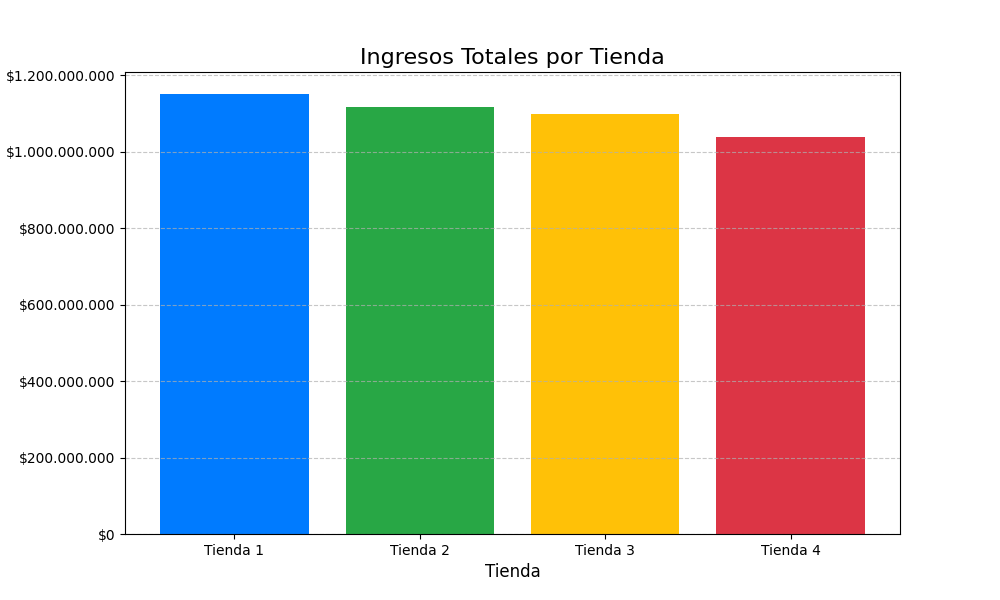


Por consiguiente, las ventas por categoría , es un factor decisivo, ya que, es aquella donde la demanda de sus productos ya es alta, se deja el gráfico del resultado de los hallazgos, como también se puede validar el producto más y menos vendidos por Tienda.



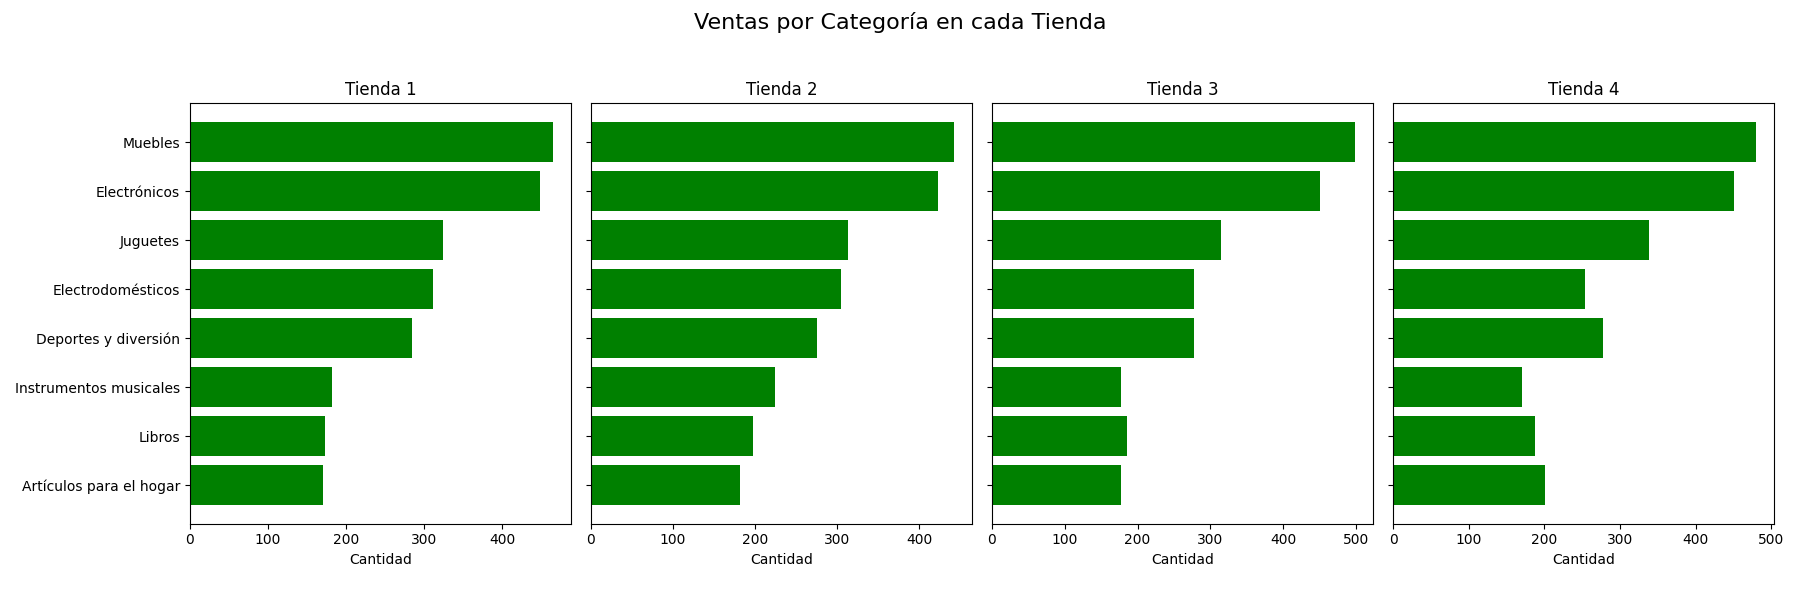


En la siguiente sección, se visualizará el ranking promedio por Tienda, Las calificaciones son un indicador de la salud operativa de la tienda y la confianza del cliente. Una tienda con alta satisfacción puede generar clientes más leales y recurrentes. Tienda 3 lidera como mejor calificado.

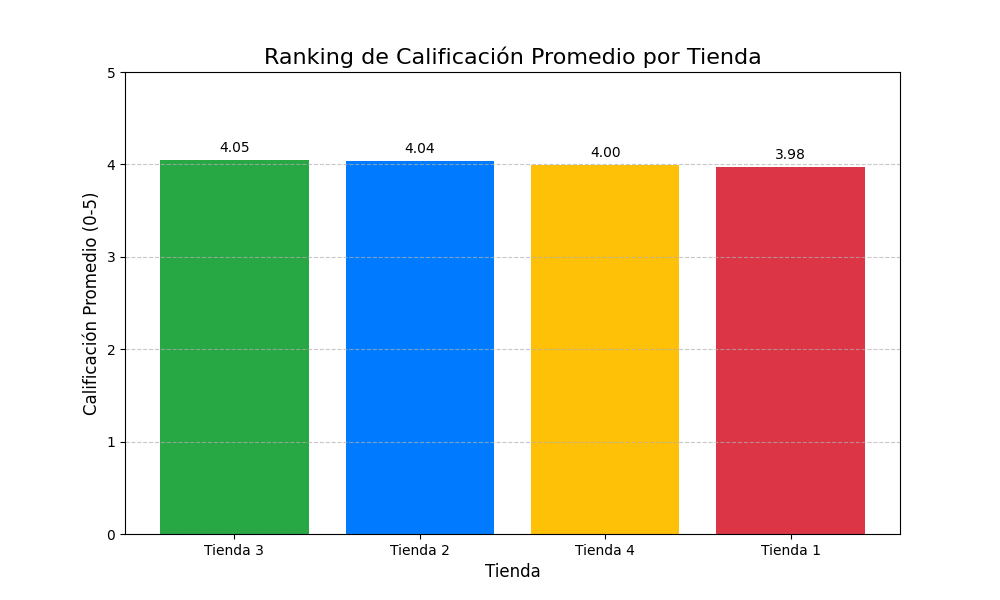


Por último pero no menos importante se encuentra el coste de envío promedio para cada tienda, entendiendo que el cliente es el que costea ese items, los promedios son:


```
--- Costo de Envio Promedio por Tienda ---
Tienda 1: $26.019
Tienda 2: $25.216
Tienda 3: $24.806
Tienda 4: $23.459
```

Donde se valida que la Tienda 4 es la que promedia menor costo, dando indicio a un envío más barato



Se espera que Sr. Juan en base a este informe pueda elegir donde vender sus productos, ayudandose con los indicadores ya mostrados.

En mi opinión personal y basandose en los indicadores la mejor elección se encuentra en la Tienda 1 y Tienda 4, ya que a mayor ingreso, más demanda, como a menor costo de envío, mayor preferencia, depende netamente de Sr. Juan elegir la que le convenga mejor.